In [1]:
import numpy as np
import figure_options
from figure_options import plt, sns, rc_parameters
from tqdm import tqdm
from baifg.utils.characteristic_time import evaluate_characteristic_time_gaussian, compute_characteristic_time_gaussian
from baifg.model.feedback_graph import FeedbackGraph, Graph
from baifg.model.reward_model import GaussianRewardModel

def make_loopystar_graph(p: float, q: float, r: float, K: int) -> FeedbackGraph:
    G = np.zeros((K,K))
    G[0] =  [q]+ [r] * (K-2) + [p]
    G[1:,1:] = np.eye(K-1) * max(0, 1-2*p)
    G[-1,-1] = 1-p

    R = GaussianRewardModel([0.5] * (K-1) + [1])

    G = Graph(G)
    fg = FeedbackGraph(R, G)
    return fg


In [2]:
K = 5
eps = 0
N = 100
pvalues = np.linspace(0, 1, N)
Tvalues1 = []
Tvalues2 = []

for p in tqdm(pvalues):
    fg = make_loopystar_graph(p, q=1, r=0.25, K=K)
    sol = compute_characteristic_time_gaussian(fg)
    Tvalues1.append(sol.value)

    fg = make_loopystar_graph(p, q=0.25, r=0.25, K=K)
    sol = compute_characteristic_time_gaussian(fg)
    Tvalues2.append(sol.value)
Tvalues1 = np.array(Tvalues1)
Tvalues2 = np.array(Tvalues2)



100%|██████████| 100/100 [00:05<00:00, 17.38it/s]


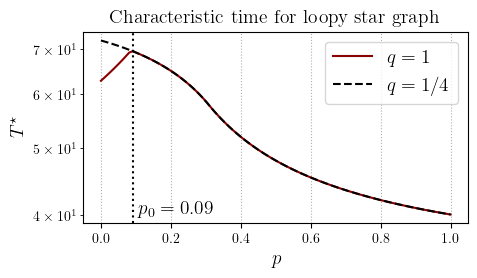

In [3]:
fig = plt.figure(figsize=(5,3))
plt.plot(pvalues, Tvalues1, label=r'$q=1$', color='darkred')
plt.plot(pvalues, Tvalues2, '--k', label=r'$q=1/4$')
p0 =pvalues[np.argwhere(np.abs(Tvalues1- Tvalues2) < 1e-3)[0]]
plt.axvline(x=p0.item(), color='black', linestyle=':')

plt.text(p0.item()*1.15, 40, f'$p_0 = {p0.item():.2f}$')

plt.yscale('log')
plt.xlabel(r'$p$')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(linestyle = ":")
plt.title("Characteristic time for loopy star graph")
plt.tight_layout()

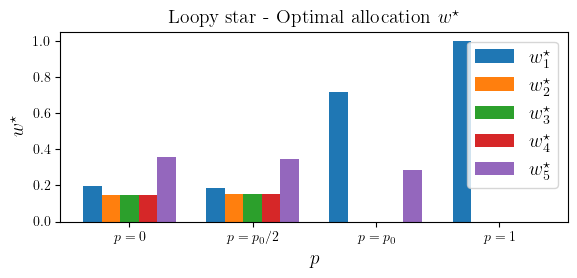

In [6]:
p1 = 1
sol0 = compute_characteristic_time_gaussian(make_loopystar_graph(p=0, q=1, r=0.25,  K=K))
sol1 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item()/2, q=1, r=0.25,  K=K))
sol2 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item(), q=1, r=0.25,  K=K))
sol3 = compute_characteristic_time_gaussian(make_loopystar_graph(p=1, q=1, r=0.25,  K=K))
solutions = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar, sol3.wstar])

def plot_w(solutions):
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(6,3))
    x = np.arange(solutions.shape[0])
    for i in range(solutions.shape[1]):
        ax.bar(x + i*width, solutions[:, i], width, label=f'$w_{i+1}^\star$')

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel(r'$p$')
    ax.set_ylabel(r'$w^\star$')
    ax.set_title(r'Loopy star - Optimal allocation $w^\star$')
    ax.set_xticks(x + width*2)
    ax.set_xticklabels(['$p=0$', '$p=p_0/2$', '$p=p_0$', '$p=1$'])
    ax.legend()

    plt.tight_layout()
    plt.show()
plot_w(solutions)

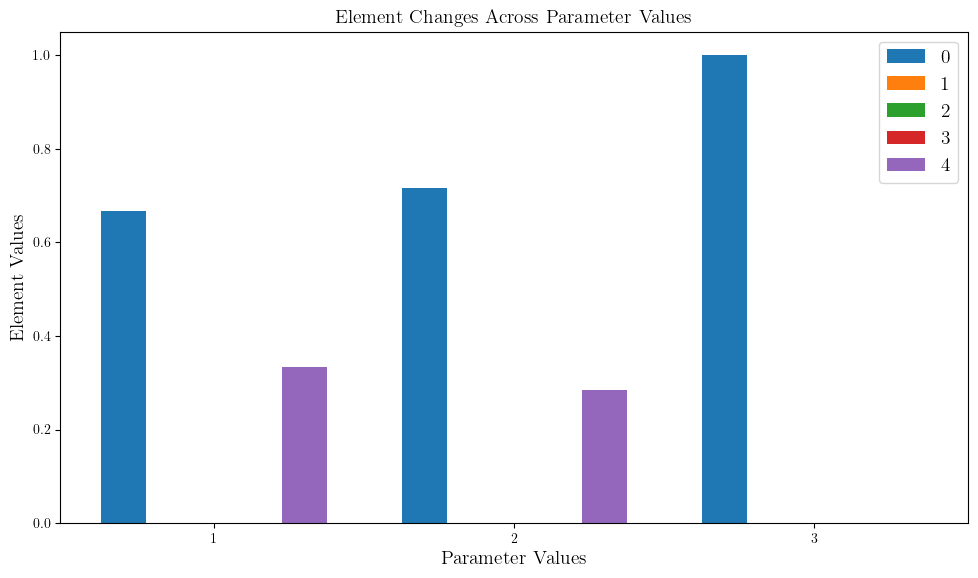

In [5]:
p1 = 1
sol0 = compute_characteristic_time_gaussian(make_loopystar_graph(p=0, q=0.25, r=0.25,  K=K))
sol1 = compute_characteristic_time_gaussian(make_loopystar_graph(p=p0.item(), q=0.25, r=0.25,  K=K))
sol2 = compute_characteristic_time_gaussian(make_loopystar_graph(p=1, q=0.25, r=0.25,  K=K))


solutions = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar])
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(3)
for i in range(solutions.shape[1]):
    ax.bar(x + i*width, solutions[:, i], width, label=f'{i}')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Parameter Values')
ax.set_ylabel('Element Values')
ax.set_title('Element Changes Across Parameter Values')
ax.set_xticks(x + width*2)
ax.set_xticklabels(['1', '2', '3'])
ax.legend()

plt.tight_layout()
plt.show()